**Задача 2**

**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга  
(ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Посмотрим на графике, есть ли зависимость между данными?

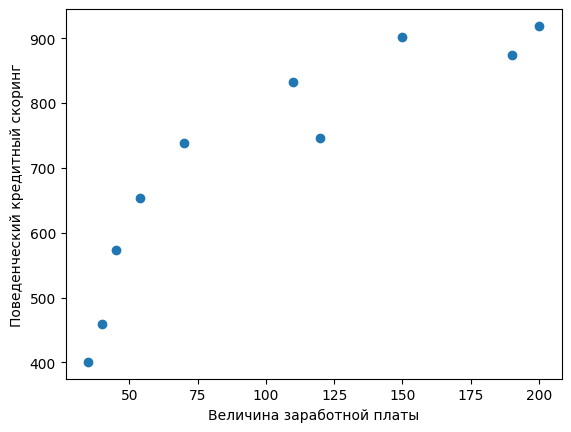

In [3]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

По графику можно предположить о наличии некоей линейной взаимосвязи между зависимой и независимой переменными,   
т.е. связь между ними можно описать некоторой линейной функцией, вида:    
$\displaystyle ks=a+b\cdot zp$  
Найдем коэффициент $b$ по формуле:  
$\displaystyle b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$

In [4]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

В качестве функции потерь выберем **среднеквадратичную** функцию:
$\displaystyle MSE=\frac{1}{n}\sum^{n}_{i=1}(\hat y_i-y_i)^2$  которая будет показывать, насколько далеко истинные значения зависимого признака будут находиться от линии регресии(расчетных значений)    

In [5]:
def _mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

Посчитаем значение для вычесленного нами коэффициента $b=2.62$

In [6]:
_mse(2.62, zp, ks)

203812.48504

Теперь попробуем подобрать такое значение коэффициента $b$, при котором $MSE\rightarrow 0$, используя свойства производной.  
Для этого вычислим производную нашей функции потерь:    

In [7]:
def _mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

Так же введем параметр - **скорость обучения** c помощью которого будем регулировать скорость подбора коэффициента $b$

In [8]:
alpha=1e-06

In [9]:
b=0.1
mse_min=_mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*_mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={_mse(b, zp,ks)}')
    if _mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=_mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=0.25952808000000005, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [10]:
b_min

5.889820285147628

---

**Задача 3**

**Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

Функция потерь:

In [11]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

Частная производная функции потерь по $a$:  

In [12]:
def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

Частная производная функции потерь по $b$:

In [13]:
def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

Скорость обучения:

In [14]:
alpha=5e-05

In [15]:
b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444

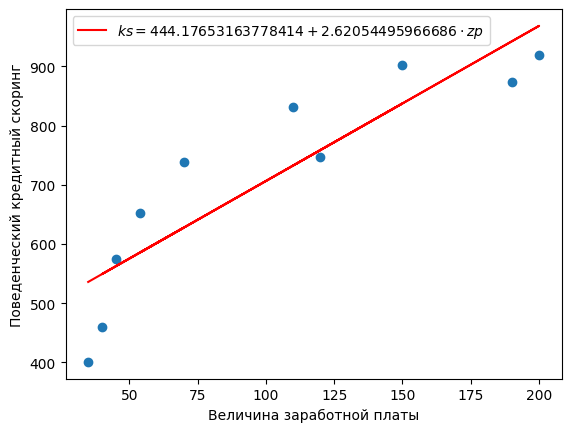

In [16]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r', label=r'$ks=444.17653163778414+2.62054495966686\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()